In [13]:
import pandas as pd 

In [14]:
district_df = pd.read_csv("clean_data/district_filtered.csv")
district_df

,RCDTS,Type,District,City,County,District Type,District Size,Student Enrollment - Total,Student Enrollment - Low Income %,Avg Class Size – All Grades,Avg Teaching Exp,Bachelor Degree,Masters Degree,Teacher Retention Rate,Teacher Avg Salary,Admin Avg Salary
0,010010010260000,District,Payson CUSD 1,Payson,Adams,UNIT,MEDIUM,559.0,48.8,17.0,11.5,56.3,43.8,92.9,36085.63,72141.72
1,010010020260000,District,Liberty CUSD 2,Liberty,Adams,UNIT,MEDIUM,602.0,24.9,20.0,13.5,41.9,58.1,91.5,41534.22,83605.24
2,010010030260000,District,Central CUSD 3,Camp Point,Adams,UNIT,MEDIUM,874.0,46.7,19.0,12.5,42.9,57.1,81.3,47686.51,75068.50
3,010010040260000,District,CUSD 4,Mendon,Adams,UNIT,MEDIUM,674.0,20.2,18.0,14.1,61.3,38.7,89.7,40254.81,83692.00
4,010011720220000,District,Quincy SD 172,Quincy,Adams,UNIT,LARGE,6469.0,60.7,18.0,12.0,56.9,42.6,73.6,45089.41,82764.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,56099201U260000,District,Crete Monee CUSD 201U,Crete,Will,UNIT,LARGE,4893.0,68.5,21.0,11.7,39.3,60.7,82.3,59303.62,105027.16
482,56099207U260000,District,Peotone CUSD 207U,Peotone,Will,UNIT,MEDIUM,1478.0,20.6,18.0,13.9,55.2,43.8,80.6,45051.57,91263.46
483,56099209U260000,District,Wilmington CUSD 209U,Wilmington,Will,UNIT,MEDIUM,1355.0,42.0,20.0,11.9,47.9,49.9,88.6,47004.75,99781.38
484,56099255U260000,District,Reed Custer CUSD 255U,Braidwood,Will,UNIT,MEDIUM,1500.0,38.7,21.0,13.5,31.3,68.7,83.5,57410.56,107871.60


In [15]:
district_df.rename(columns = {'Student Enrollment - Total':'Enrollment'}, inplace = True)
district_df.rename(columns = {'Avg Class Size – All Grades':'ClassSize'}, inplace = True)
district_df.rename(columns = {'Avg Teaching Exp':'AvgTeachExp'}, inplace = True)
district_df.rename(columns = {'Bachelor Degree':'BS'}, inplace = True)
district_df.rename(columns = {'Masters Degree':'MS'}, inplace = True)
district_df.rename(columns = {'Teacher Retention Rate':'TeachRetRate'}, inplace = True)
district_df.rename(columns = {'Admin Avg Salary':'AvgSalary'}, inplace = True)
district_df

,RCDTS,Type,District,City,County,District Type,District Size,Enrollment,Student Enrollment - Low Income %,ClassSize,AvgTeachExp,BS,MS,TeachRetRate,Teacher Avg Salary,AvgSalary
0,010010010260000,District,Payson CUSD 1,Payson,Adams,UNIT,MEDIUM,559.0,48.8,17.0,11.5,56.3,43.8,92.9,36085.63,72141.72
1,010010020260000,District,Liberty CUSD 2,Liberty,Adams,UNIT,MEDIUM,602.0,24.9,20.0,13.5,41.9,58.1,91.5,41534.22,83605.24
2,010010030260000,District,Central CUSD 3,Camp Point,Adams,UNIT,MEDIUM,874.0,46.7,19.0,12.5,42.9,57.1,81.3,47686.51,75068.50
3,010010040260000,District,CUSD 4,Mendon,Adams,UNIT,MEDIUM,674.0,20.2,18.0,14.1,61.3,38.7,89.7,40254.81,83692.00
4,010011720220000,District,Quincy SD 172,Quincy,Adams,UNIT,LARGE,6469.0,60.7,18.0,12.0,56.9,42.6,73.6,45089.41,82764.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,56099201U260000,District,Crete Monee CUSD 201U,Crete,Will,UNIT,LARGE,4893.0,68.5,21.0,11.7,39.3,60.7,82.3,59303.62,105027.16
482,56099207U260000,District,Peotone CUSD 207U,Peotone,Will,UNIT,MEDIUM,1478.0,20.6,18.0,13.9,55.2,43.8,80.6,45051.57,91263.46
483,56099209U260000,District,Wilmington CUSD 209U,Wilmington,Will,UNIT,MEDIUM,1355.0,42.0,20.0,11.9,47.9,49.9,88.6,47004.75,99781.38
484,56099255U260000,District,Reed Custer CUSD 255U,Braidwood,Will,UNIT,MEDIUM,1500.0,38.7,21.0,13.5,31.3,68.7,83.5,57410.56,107871.60


In [16]:
scores_df = pd.read_csv("clean_data/ELA and Math Districts.csv")
scores_df = scores_df.astype({'ELA': int, 'Math': int})
scores_df

,RCDTS,County,Dist #,District Name/ School Name,City,ELA,Math
0,010010010260000,Adams,10,Payson CUSD 1,Payson,524,489
1,010010020260000,Adams,20,Liberty CUSD 2,Liberty,500,485
2,010010030260000,Adams,30,Central CUSD 3,Camp Point,490,488
3,010010040260000,Adams,40,CUSD 4,Mendon,505,485
4,010011720220000,Adams,1720,Quincy SD 172,Quincy,489,473
...,...,...,...,...,...,...,...
482,56099201U260000,Will,201U,Crete Monee CUSD 201U,Crete,479,444
483,56099207U260000,Will,207U,Peotone CUSD 207U,Peotone,513,492
484,56099209U260000,Will,209U,Wilmington CUSD 209U,Wilmington,480,458
485,56099255U260000,Will,255U,Reed Custer CUSD 255U,Braidwood,479,483


In [17]:
merge_df = pd.merge(district_df, scores_df, on = "RCDTS", how = "inner")
merge_df = merge_df.dropna()
merge_df = merge_df.drop(columns = ['RCDTS', 'Type', 'District', 'City_x', 'District Type', 'District Size',
                                   'District Name/ School Name', 'City_y', 'County', 'County ', 'Dist # ', 
                                   'Student Enrollment - Low Income %'])
merge_df

,Enrollment,ClassSize,AvgTeachExp,BS,MS,TeachRetRate,Teacher Avg Salary,AvgSalary,ELA,Math
0,559.0,17.0,11.5,56.3,43.8,92.9,36085.63,72141.72,524,489
1,602.0,20.0,13.5,41.9,58.1,91.5,41534.22,83605.24,500,485
2,874.0,19.0,12.5,42.9,57.1,81.3,47686.51,75068.50,490,488
3,674.0,18.0,14.1,61.3,38.7,89.7,40254.81,83692.00,505,485
4,6469.0,18.0,12.0,56.9,42.6,73.6,45089.41,82764.57,489,473
...,...,...,...,...,...,...,...,...,...,...
470,4893.0,21.0,11.7,39.3,60.7,82.3,59303.62,105027.16,479,444
471,1478.0,18.0,13.9,55.2,43.8,80.6,45051.57,91263.46,513,492
472,1355.0,20.0,11.9,47.9,49.9,88.6,47004.75,99781.38,480,458
473,1500.0,21.0,13.5,31.3,68.7,83.5,57410.56,107871.60,479,483


In [18]:
X = merge_df.drop(columns = ['ELA', 'Math'], axis = 1)
X.head(2)

,Enrollment,ClassSize,AvgTeachExp,BS,MS,TeachRetRate,Teacher Avg Salary,AvgSalary
0,559.0,17.0,11.5,56.3,43.8,92.9,36085.63,72141.72
1,602.0,20.0,13.5,41.9,58.1,91.5,41534.22,83605.24


In [19]:
y = merge_df['Math']

In [20]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [21]:
# splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [22]:
y_prediction =  LR.predict(x_test)
y_prediction

array([534.55261322, 499.39042174, 488.09747997, 475.06415155,
       477.85370674, 460.67351172, 477.75717888, 465.46720718,
       475.2311576 , 478.1635767 , 483.55249233, 485.83424841,
       527.38112923, 500.70789808, 483.80199583, 488.50972103,
       492.16974865, 480.56654106, 482.5749674 , 490.72801526,
       487.89084099, 463.5745808 , 481.51156937, 455.69935429,
       474.10154556, 480.28882899, 511.97021186, 460.74205783,
       481.69345081, 506.0344051 , 487.93478438, 450.95313477,
       516.49348912, 514.34740534, 502.22674103, 505.31423409,
       499.31745974, 462.72876847, 467.68664267, 451.19880875,
       481.20534142, 528.37782979, 486.83412867, 479.47895284,
       460.40193402, 481.64309316, 492.46043099, 490.56220402,
       525.56211758, 494.41507581, 467.49346095, 474.53568558,
       507.69919161, 483.06295276, 498.7708741 , 502.91004773,
       478.4597438 , 468.00963965, 483.73652406, 481.07152041,
       485.70779802, 488.25597598, 491.98897373, 493.29

r2 score is  0.21826194730863835
mean_sqrd_error is== 1227.4384026007515
root_mean_squared error of is== 35.034817005384106


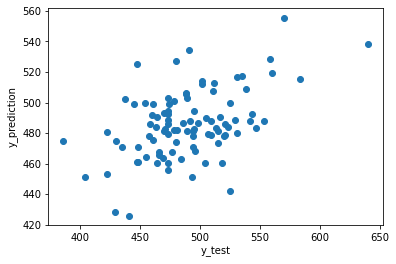

In [23]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

# predicting the accuracy score
score = r2_score(y_test,y_prediction)
print('r2 score is ', score)
print('mean_sqrd_error is==', mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==', np.sqrt(mean_squared_error(y_test,y_prediction)))

#scatter plot of test vs prediction
plt.scatter(y_test, y_prediction)
plt.xlabel('y_test')
plt.ylabel('y_prediction')
plt.show()

r2 score is  0.24423964724536484
mean_sqrd_error is== 789.4588066708019
root_mean_squared error of is== 28.097309598443797


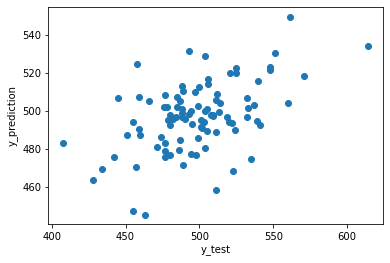

In [24]:
y = merge_df['ELA']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# creating an object of LinearRegression class
LR = LinearRegression()

# fitting the training data
LR.fit(x_train,y_train)
y_prediction =  LR.predict(x_test)

# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

# predicting the accuracy score
score = r2_score(y_test,y_prediction)
print('r2 score is ', score)
print('mean_sqrd_error is==', mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==', np.sqrt(mean_squared_error(y_test,y_prediction)))

#scatter plot of test vs prediction
plt.scatter(y_test, y_prediction)
plt.xlabel('y_test')
plt.ylabel('y_prediction')
plt.show()